In [22]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_grouped_histograms,\
    plot_grouped_boxplots, plot_combined_graphs, plot_categorical_numerical_relationship, bubble_plot,\
        grafico_dispersion_con_correlacion
from scipy.stats import chi2_contingency, mannwhitneyu
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
df= pd.read_csv("amazon_cleaned.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        656 non-null    object 
 1   Author       656 non-null    object 
 2   Theme        656 non-null    object 
 3   Rating       656 non-null    float64
 4   Price        656 non-null    float64
 5   Year         656 non-null    int64  
 6   Total_pages  656 non-null    object 
 7   Reviews      656 non-null    int64  
 8   Amazon_year  656 non-null    int64  
 9   Categories   656 non-null    object 
 10  Genres       656 non-null    object 
 11  Publisher    656 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 61.6+ KB


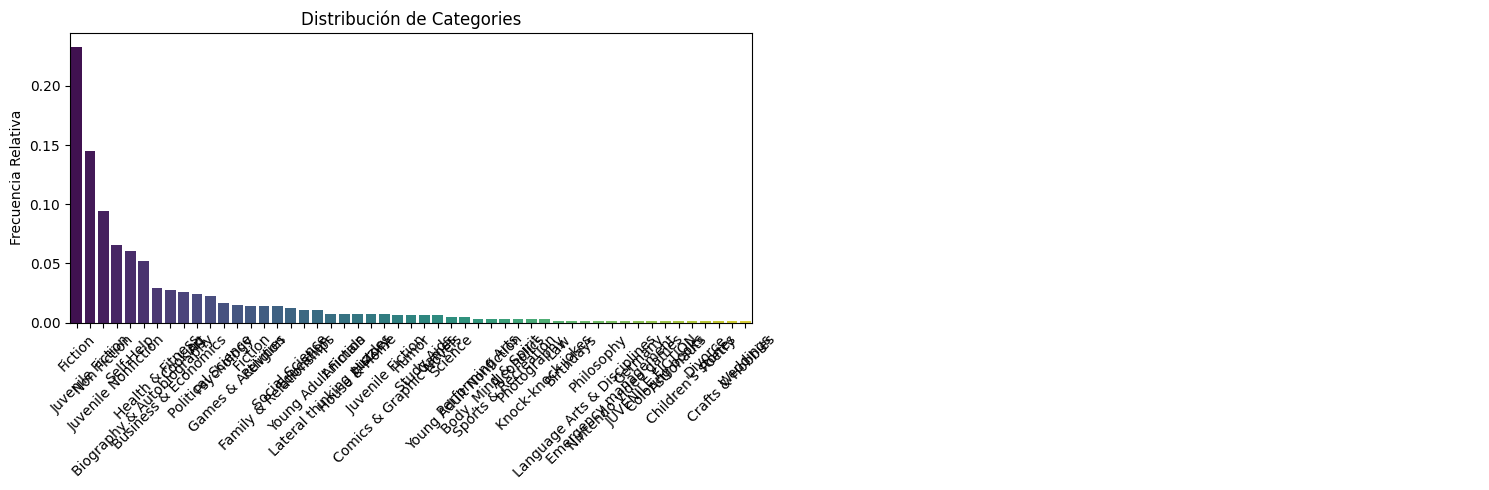

In [11]:
pinta_distribucion_categoricas(df,["Categories"], relativa= True, mostrar_valores= False)

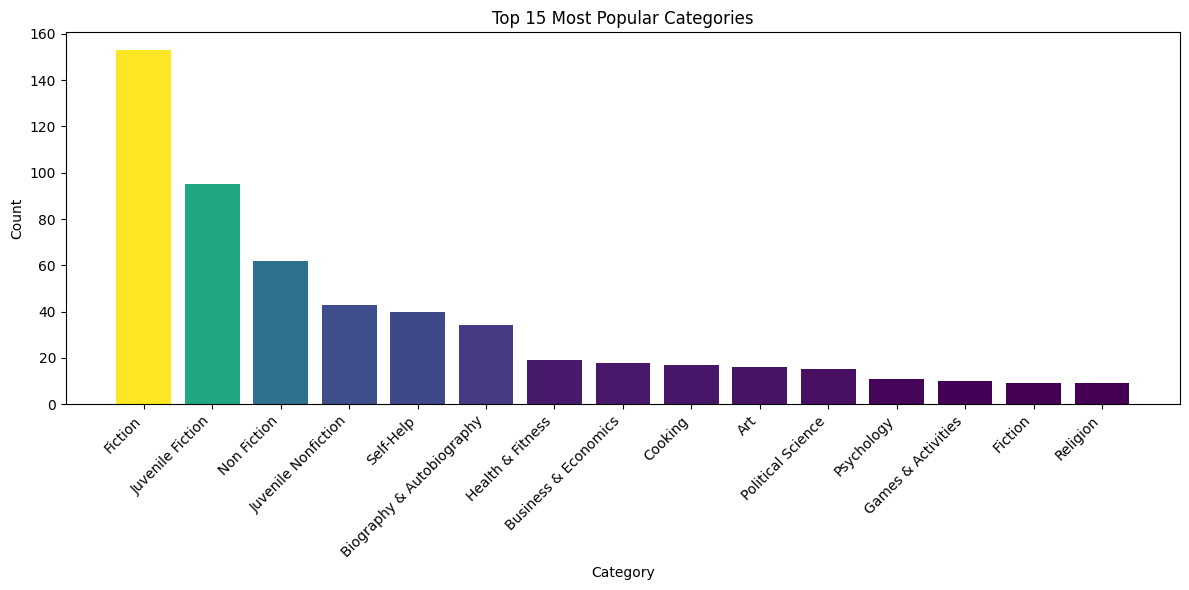

In [ ]:
#Most popular categories overall

cat_counts = df['Categories'].value_counts().nlargest(15)

# Normalize values to map to colormap
norm = plt.Normalize(cat_counts.min(), cat_counts.max())
colors = cm.viridis(norm(cat_counts.values))

# Plot with gradient colors
plt.figure(figsize=(12, 6))
bars = plt.bar(cat_counts.index, cat_counts.values, color=colors)
plt.title('Top 15 Most Popular Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

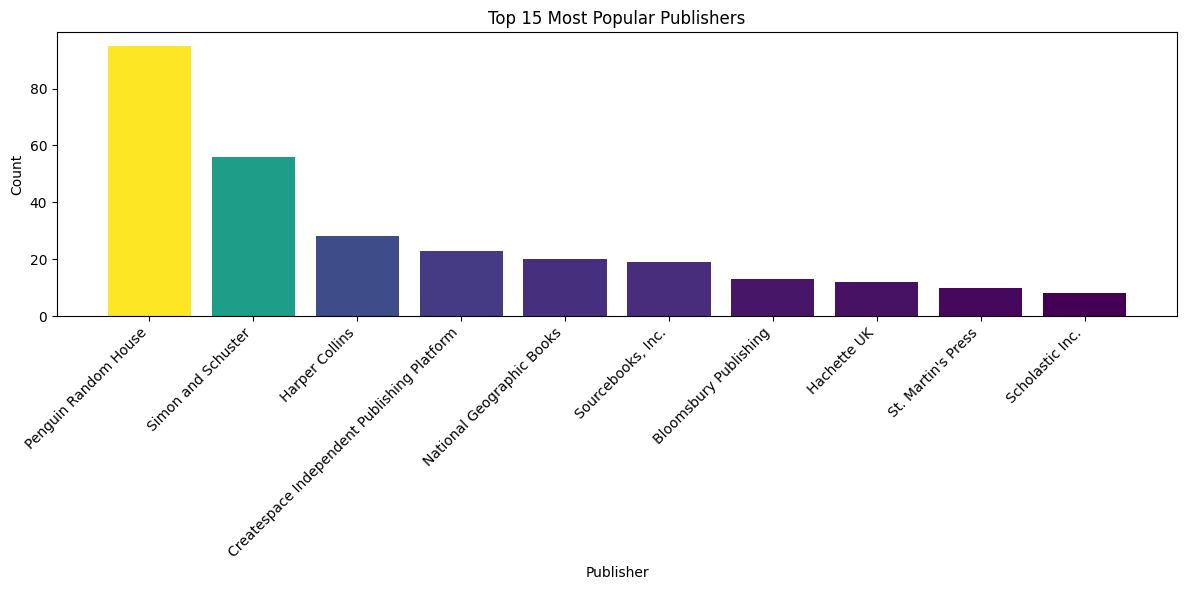

In [ ]:
#Top 15 Most popular Publishers

cat_counts = df['Publisher'].value_counts().nlargest(10)

# Normalize values to map to colormap
norm = plt.Normalize(cat_counts.min(), cat_counts.max())
colors = cm.viridis(norm(cat_counts.values))

# Plot with gradient colors
plt.figure(figsize=(12, 6))
bars = plt.bar(cat_counts.index, cat_counts.values, color=colors)
plt.title('Top 15 Most Popular Publishers')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:


# Group by book title and count the number of years each book was a bestseller
top_books = df['Title'].value_counts().nlargest(15)
top_books


Title
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)    10
The Very Hungry Caterpillar                                                           8
Oh, the Places You'll Go!                                                             8
What to Expect When You're Expecting: (Updated in 2024)                               7
Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones             7
The Alchemist: A Modern Classic of Magic and Mysticism (Perennial Classics)           6
The 5 Love Languages: The Secret to Love that Lasts                                   6
To Kill a Mockingbird                                                                 6
If Animals Kissed Good Night                                                          6
Where the Crawdads Sing: Reese's Book Club                                            6
Chicka Chicka Boom Boom (Board Book)                                                  6
Giraffes Can't Dance      

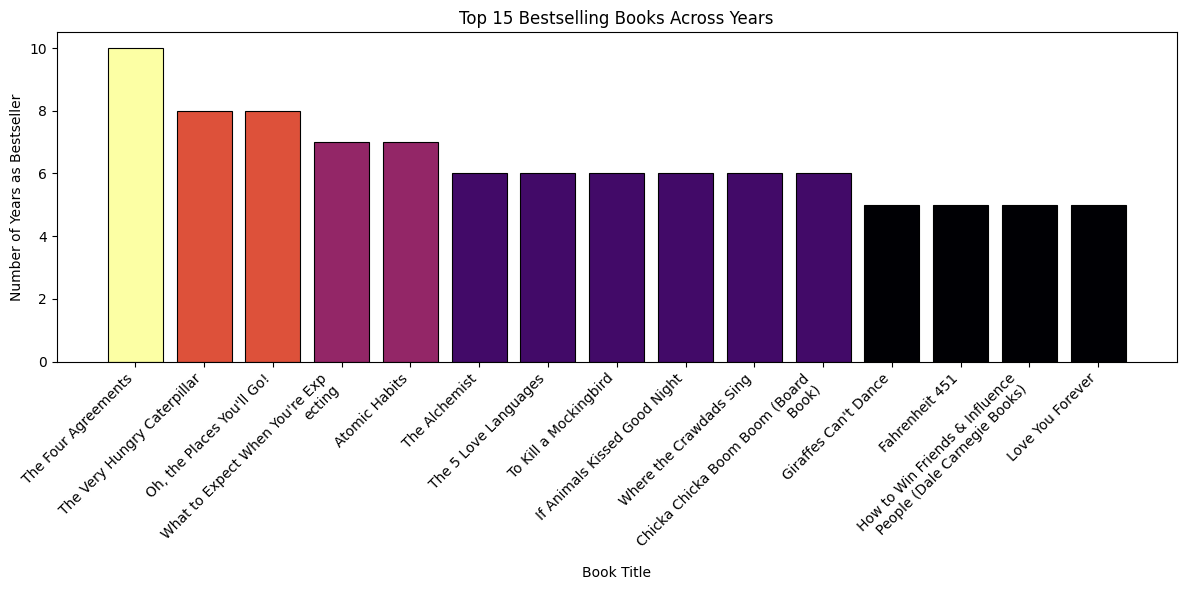

In [54]:


# Count how many times each book appears
top_books = df['Title'].value_counts().nlargest(15)
top_books.index = top_books.index.str.split(':').str[0].str.strip()

# Wrap long titles for display (at 30 chars)
wrapped_labels = [
    '\n'.join(title[i:i+30] for i in range(0, len(title), 30)) 
    for title in top_books.index
]

# Normalize for colormap
norm = plt.Normalize(top_books.min(), top_books.max())
colors = cm.inferno(norm(top_books.values))

# Plot
plt.figure(figsize=(12, 6))
plt.bar(wrapped_labels, top_books.values, color=colors, edgecolor='black', linewidth=0.8)

# Customize
plt.title('Top 15 Bestselling Books Across Years')
plt.xlabel('Book Title')
plt.ylabel('Number of Years as Bestseller')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

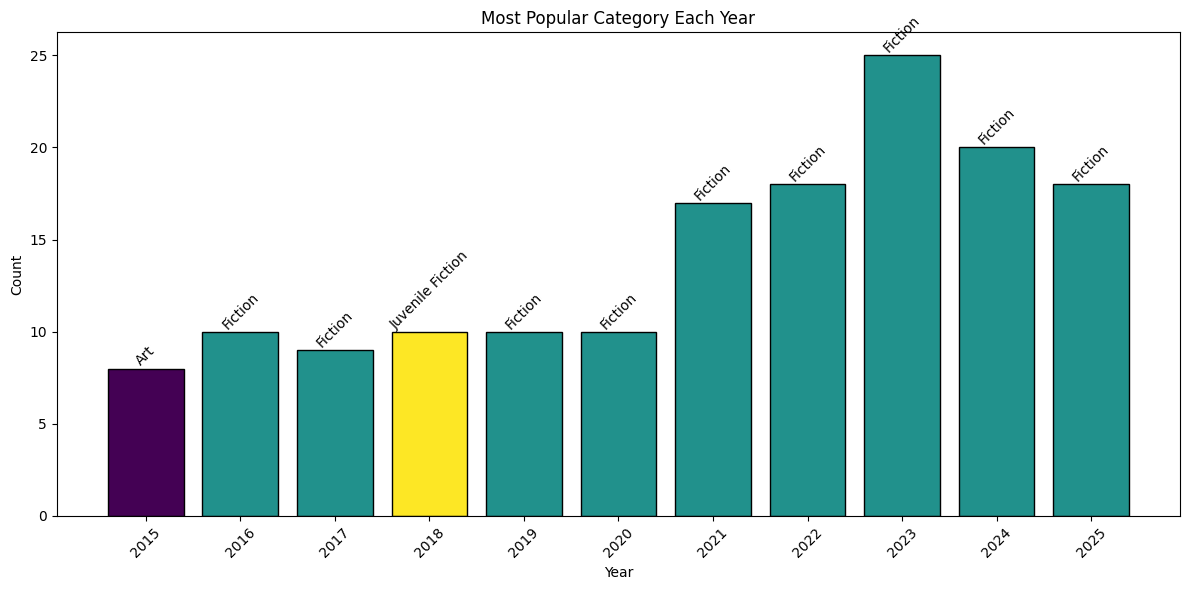

In [74]:

cat_counts_per_year = df.groupby(['Amazon_year', 'Categories']).size().reset_index(name='Count')




# Get the most popular category for each year
most_popular_per_year = cat_counts_per_year.loc[
    cat_counts_per_year.groupby('Amazon_year')['Count'].idxmax()
]
# Get unique categories
unique_categories = most_popular_per_year['Categories'].unique()

# Create a color map: Assign a unique color to each category
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_categories)))

# Create a dictionary to map each category to a color
category_to_color = {category: colors[i] for i, category in enumerate(unique_categories)}

# Assign colors to the bars based on the category
bar_colors = most_popular_per_year['Categories'].map(category_to_color)

# Plot the results
plt.figure(figsize=(12, 6))
bars = plt.bar(most_popular_per_year['Amazon_year'].astype(str), most_popular_per_year['Count'], 
               color=bar_colors, edgecolor='black')

# Annotate each bar with the category name at the top
for bar, category in zip(bars, most_popular_per_year['Categories']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), category, 
             ha='center', va='bottom', fontsize=10, rotation=45)

# Customize plot
plt.title('Most Popular Category Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Genres
Non Fiction    386
Fiction        270
Name: count, dtype: int64

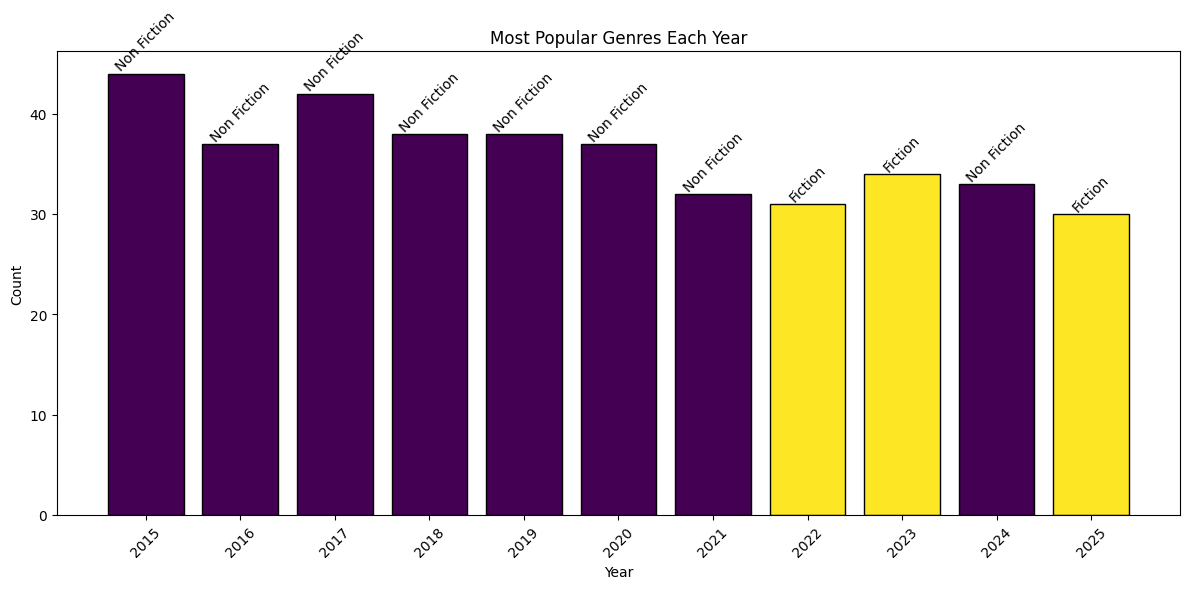

In [76]:

cat_counts_per_year = df.groupby(['Amazon_year', 'Genres']).size().reset_index(name='Count')




# Get the most popular category for each year
most_popular_per_year = cat_counts_per_year.loc[
    cat_counts_per_year.groupby('Amazon_year')['Count'].idxmax()
]
# Get unique categories
unique_categories = most_popular_per_year['Genres'].unique()

# Create a color map: Assign a unique color to each category
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_categories)))

# Create a dictionary to map each category to a color
category_to_color = {category: colors[i] for i, category in enumerate(unique_categories)}

# Assign colors to the bars based on the category
bar_colors = most_popular_per_year['Genres'].map(category_to_color)

# Plot the results
plt.figure(figsize=(12, 6))
bars = plt.bar(most_popular_per_year['Amazon_year'].astype(str), most_popular_per_year['Count'], 
               color=bar_colors, edgecolor='black')

# Annotate each bar with the category name at the top
for bar, category in zip(bars, most_popular_per_year['Genres']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), category, 
             ha='center', va='bottom', fontsize=10, rotation=45)

# Customize plot
plt.title('Most Popular Genres Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

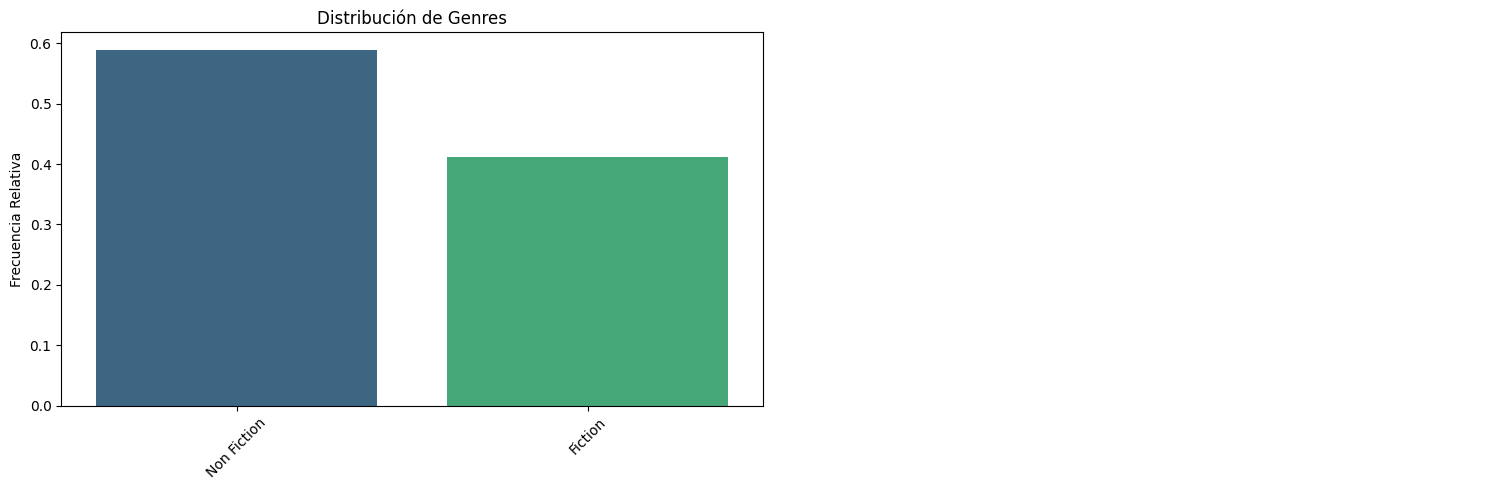

In [12]:
pinta_distribucion_categoricas(df,["Genres"], relativa= True, mostrar_valores= False)

(2,)


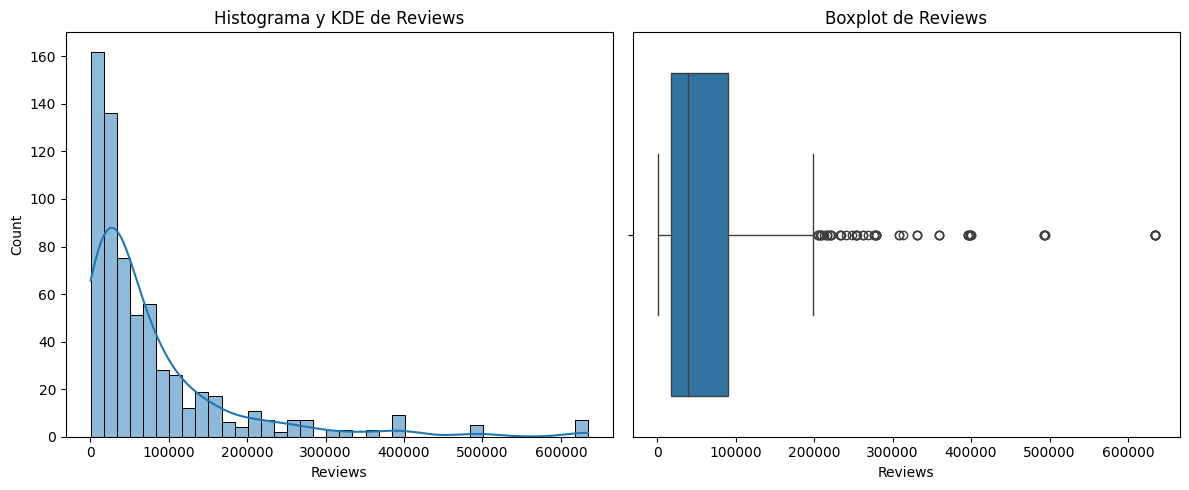

In [85]:
plot_combined_graphs(df,["Reviews"])

(2,)


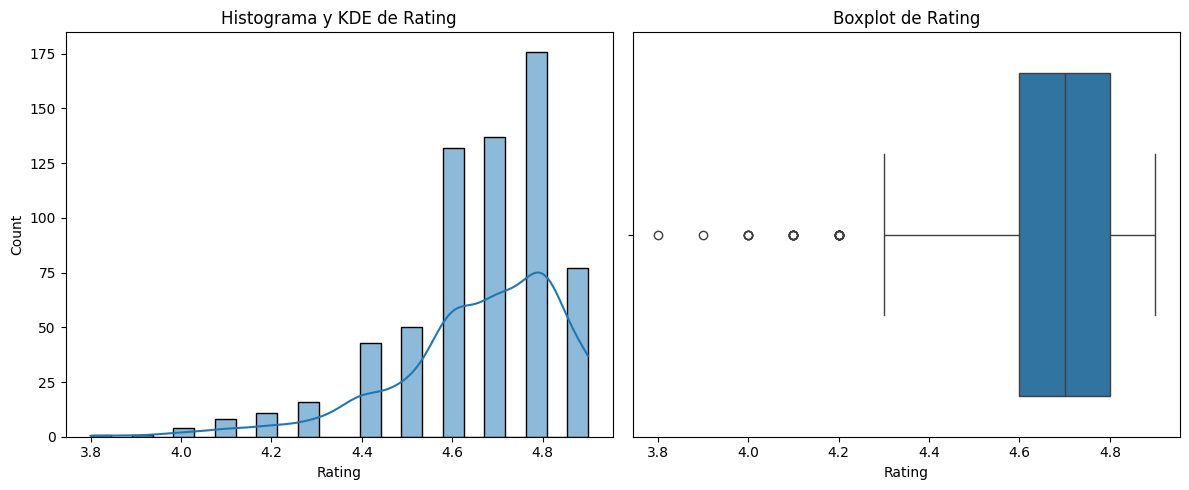

In [88]:
plot_combined_graphs(df,["Rating"])

(2,)


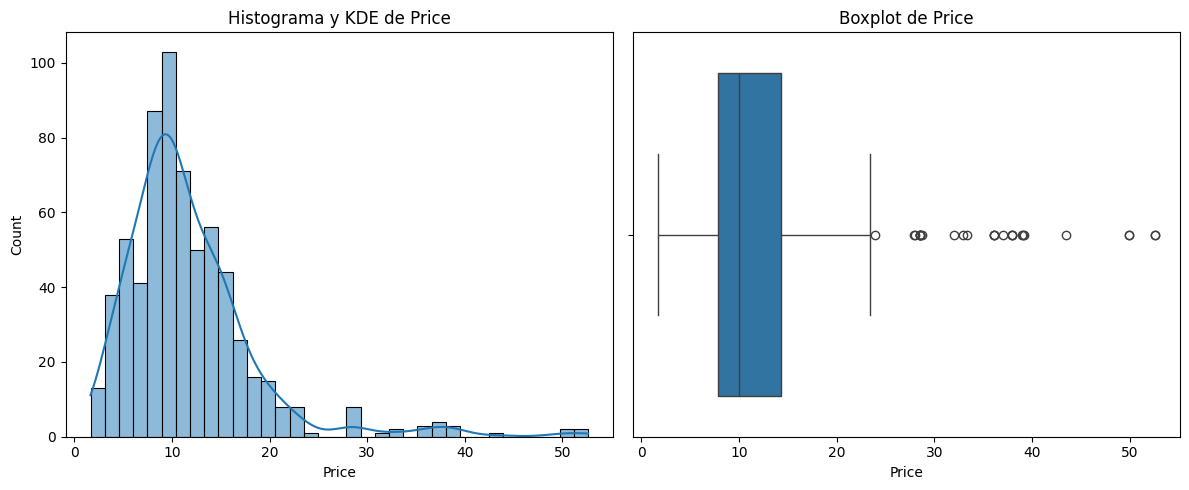

In [90]:
plot_combined_graphs(df,["Price"])

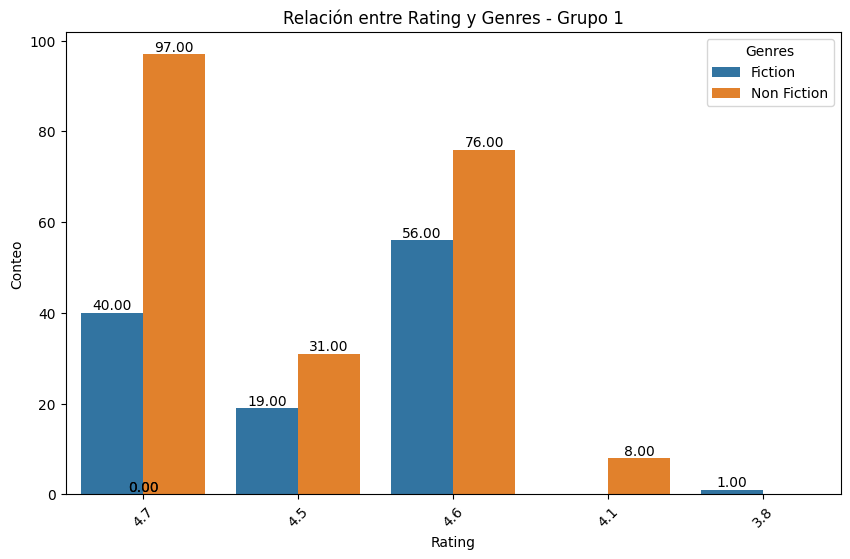

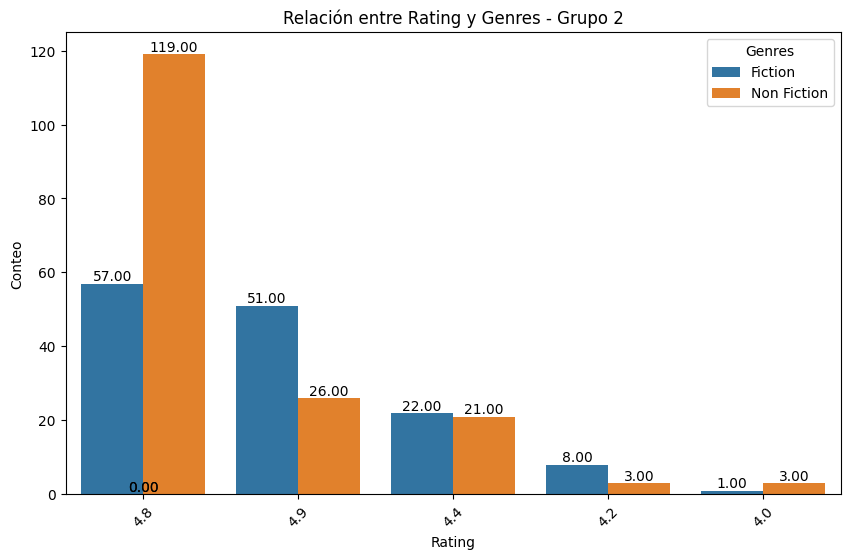

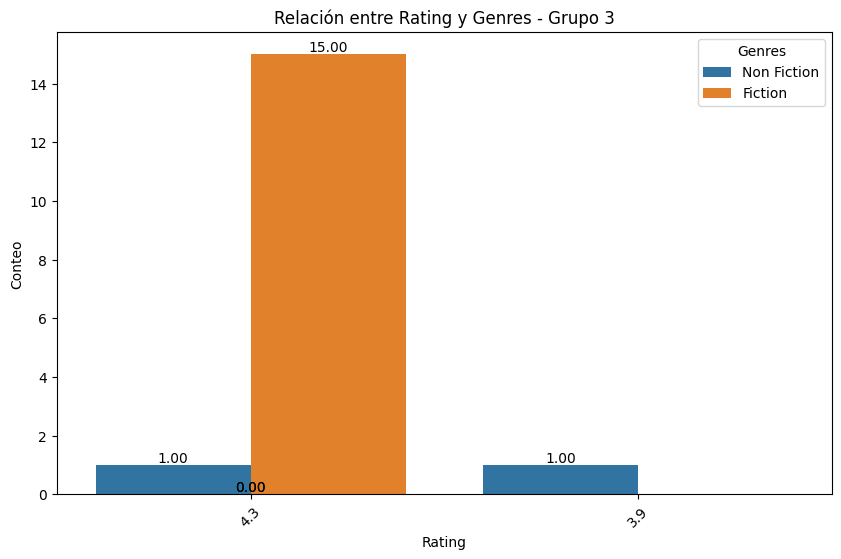

In [92]:
plot_categorical_relationship_fin(df, "Rating","Genres", show_values= True)

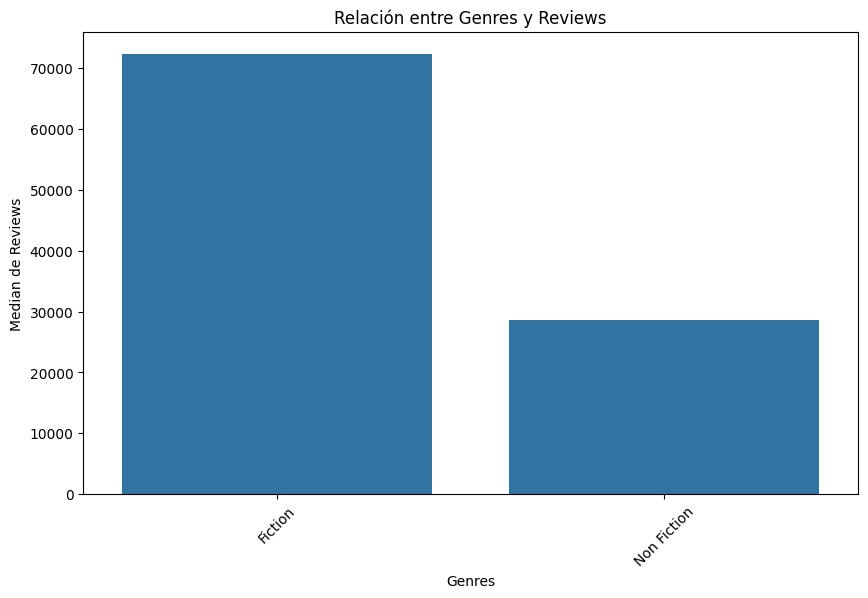

In [94]:
plot_categorical_numerical_relationship(df, "Genres","Reviews",measure="median")

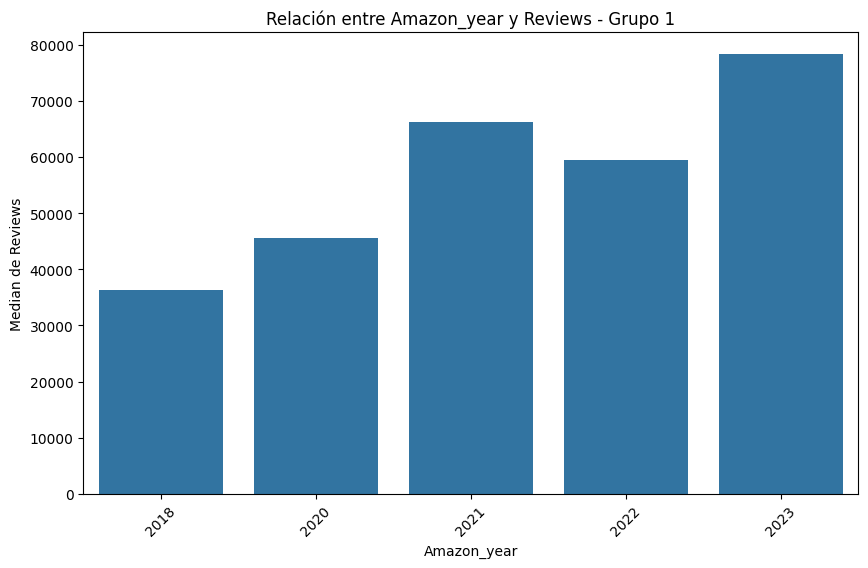

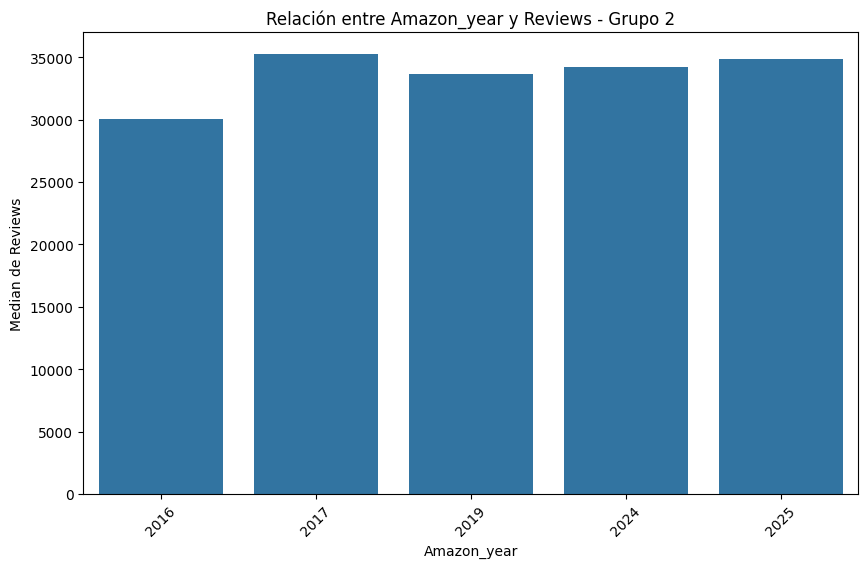

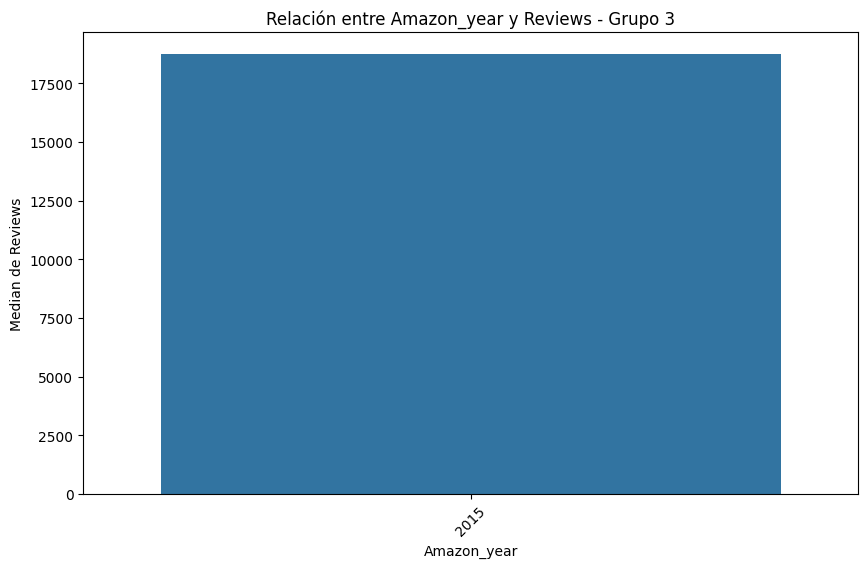

In [96]:
plot_categorical_numerical_relationship(df, "Amazon_year","Reviews",measure="median")

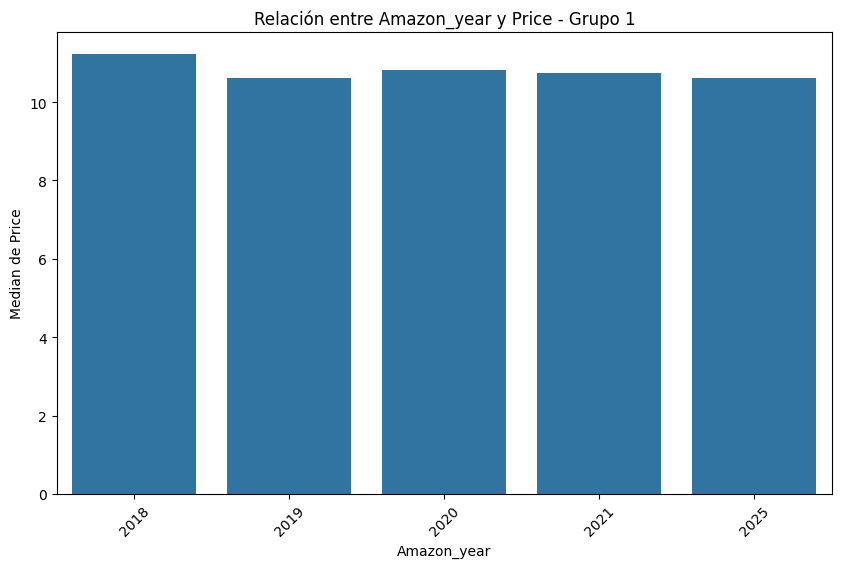

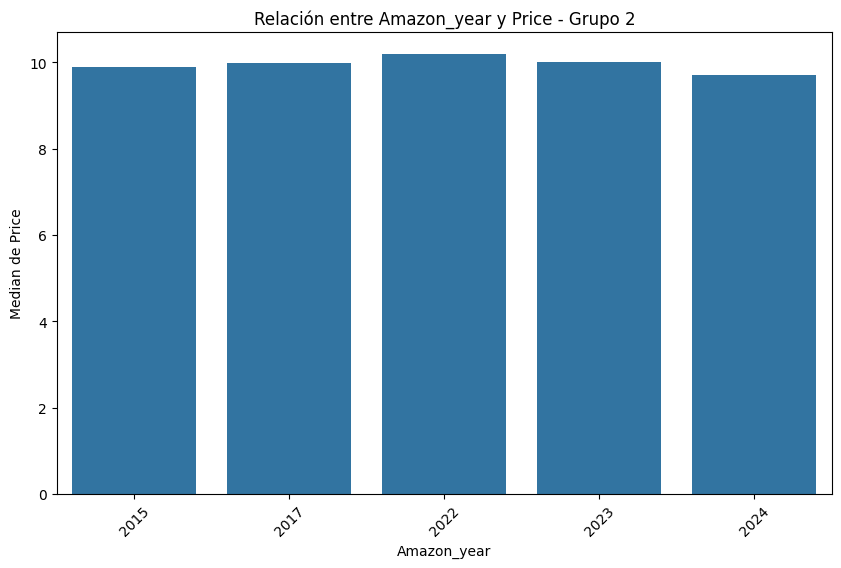

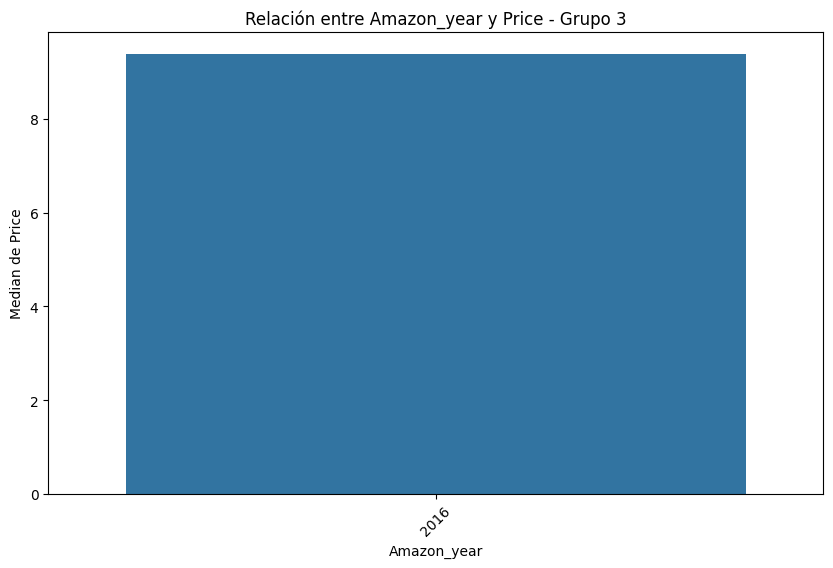

In [100]:
plot_categorical_numerical_relationship(df, "Amazon_year","Price",measure="median")

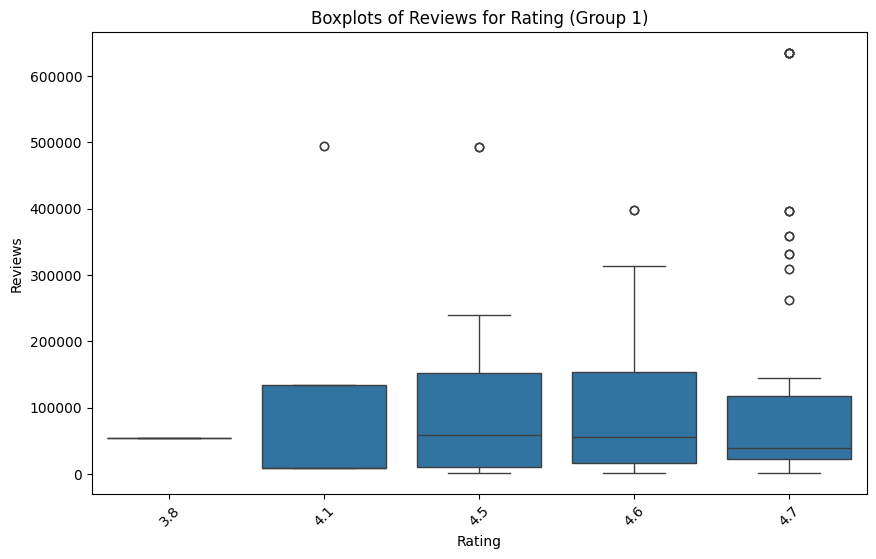

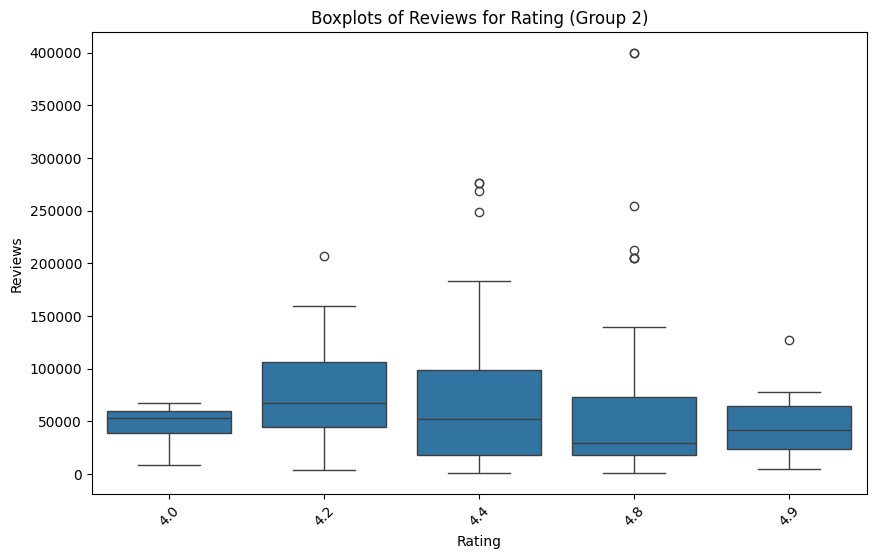

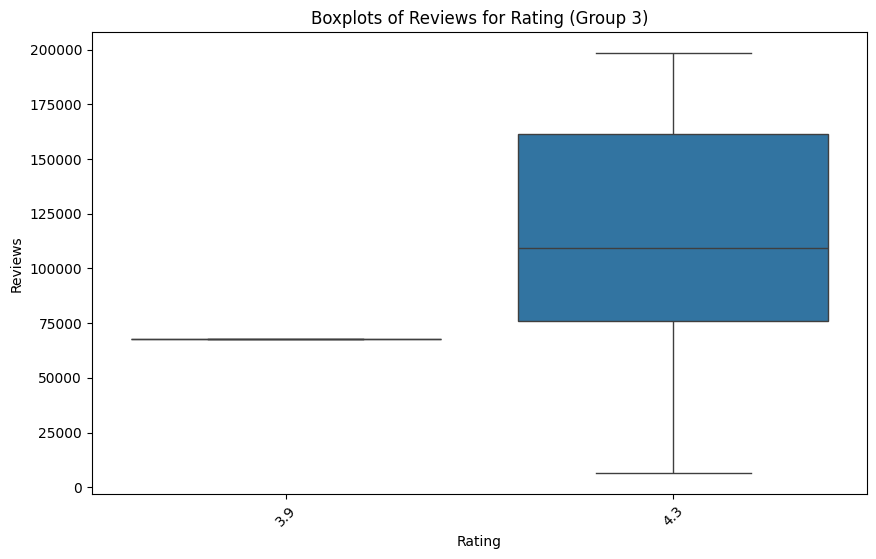

In [101]:
plot_grouped_boxplots(df,"Rating","Reviews")

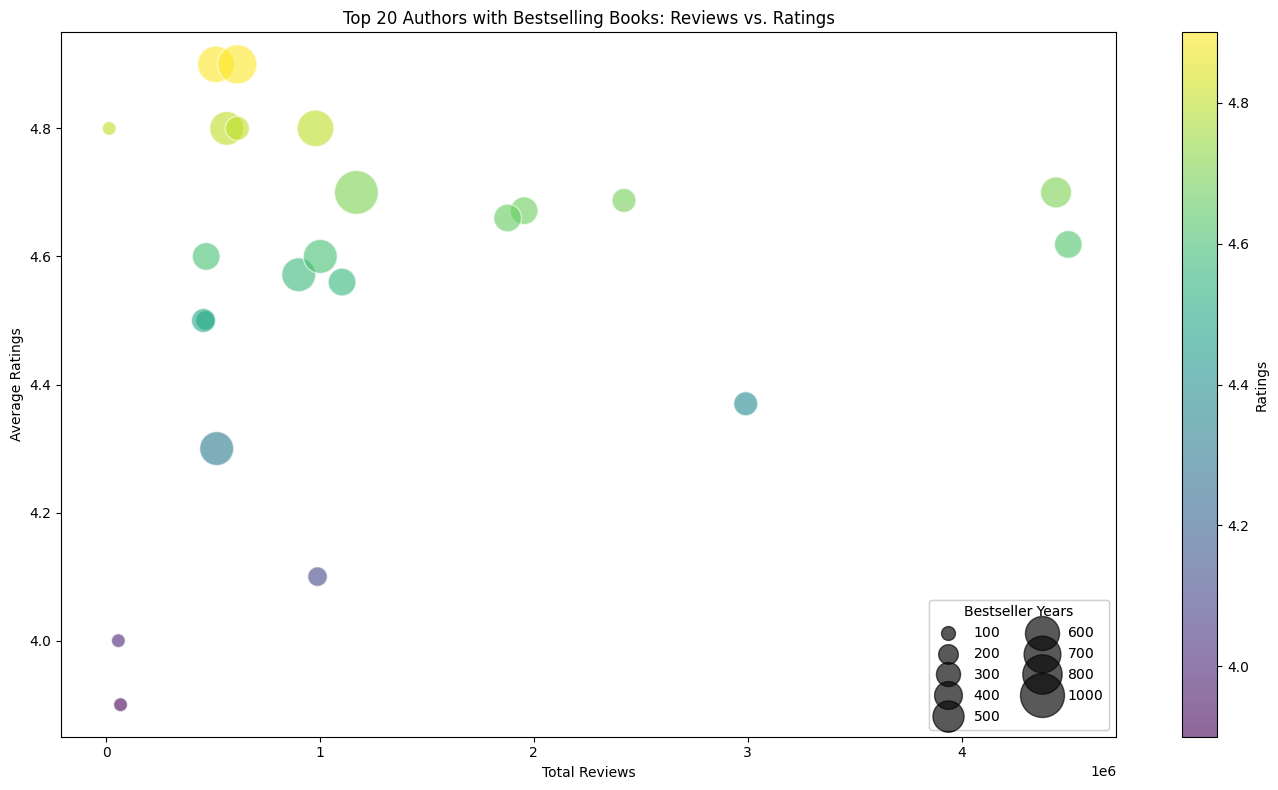

In [126]:

# Assuming df has 'Author', 'Category', 'Reviews', 'Ratings', 'Bestseller Year'
# Summarize data for authors, their total reviews, average ratings, and number of bestseller years
author_performance = df.groupby(["Author","Categories"]).agg(
    reviews=('Reviews', 'sum'),
    ratings=('Rating', 'mean'),
    bestseller_years=('Amazon_year', 'nunique')
).reset_index()

# Get the top 10 authors based on the total reviews
top_20_authors = author_performance.groupby('Author')['reviews'].sum().nlargest(20).index
top_20_author_data = author_performance[author_performance['Author'].isin(top_20_authors)]

# Plotting Bubble Chart
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    x=top_20_author_data['reviews'], 
    y=top_20_author_data['ratings'], 
    s=top_20_author_data['bestseller_years']*100,  # Bubble size
    alpha=0.6, edgecolors="w", 
    c=top_20_author_data["ratings"], cmap='viridis'
)

# Add labels and title
plt.title('Top 20 Authors with Bestselling Books: Reviews vs. Ratings')
plt.xlabel('Total Reviews')
plt.ylabel('Average Ratings')
plt.colorbar(scatter, label='Ratings')


bubble_sizes = top_20_author_data['bestseller_years'].unique()
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend1 = plt.legend(handles, labels, title="Bestseller Years", loc="lower right", fontsize=10,ncol=2 )
plt.gca().add_artist(legend1)




plt.tight_layout()
plt.show()


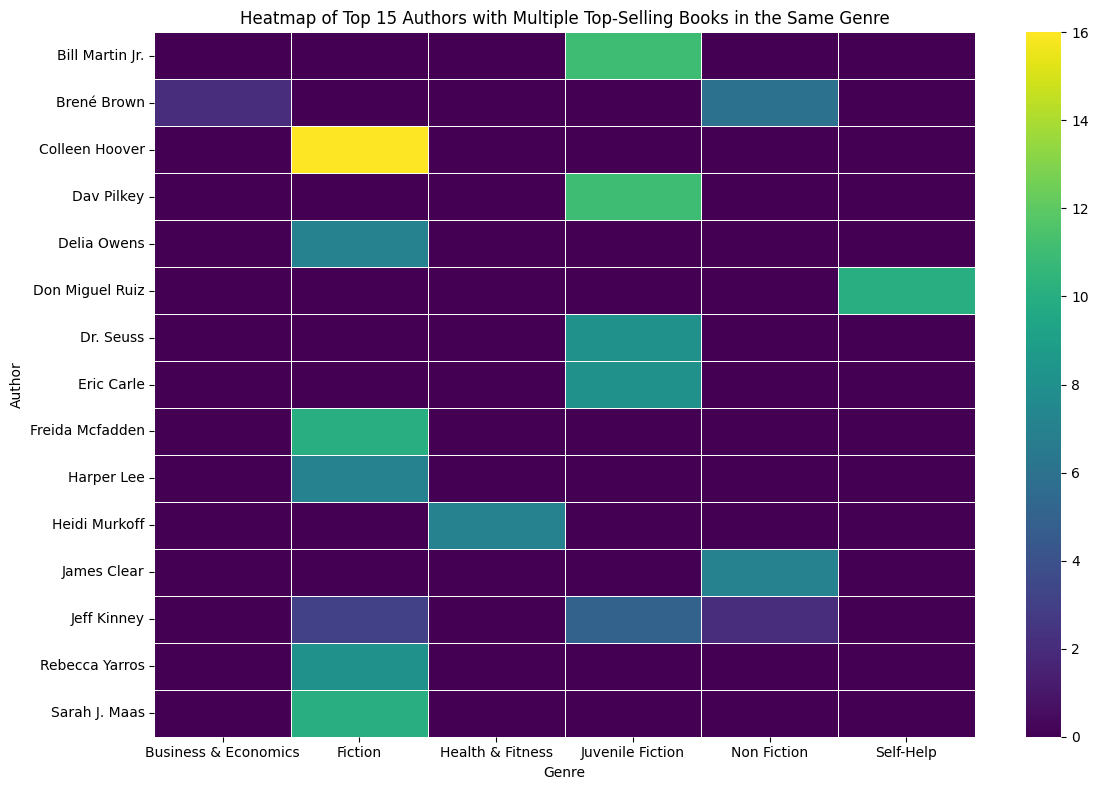

In [150]:
author_genre_counts = df.groupby(['Author', 'Categories']).size().reset_index(name='book_count')

# Filter out authors with only 1 book per genre
authors_with_multiple_books = author_genre_counts[author_genre_counts['book_count'] > 1]

# Get the top 10 authors based on the total number of books
top_15_authors = authors_with_multiple_books.groupby('Author')['book_count'].sum().nlargest(15).index

# Filter the original dataframe to include only the top 10 authors
top_10_data = authors_with_multiple_books[authors_with_multiple_books['Author'].isin(top_15_authors)]

# Pivot the data to create a matrix of authors vs genres
pivot_data = top_10_data.pivot_table(index='Author', columns='Categories', values='book_count', aggfunc='sum', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=False, cmap='viridis', fmt='d', linewidths=0.5, )

# Add title and labels
plt.title('Heatmap of Top 15 Authors with Multiple Top-Selling Books in the Same Genre')
plt.xlabel('Genre')
plt.ylabel('Author')

plt.tight_layout()
plt.show()




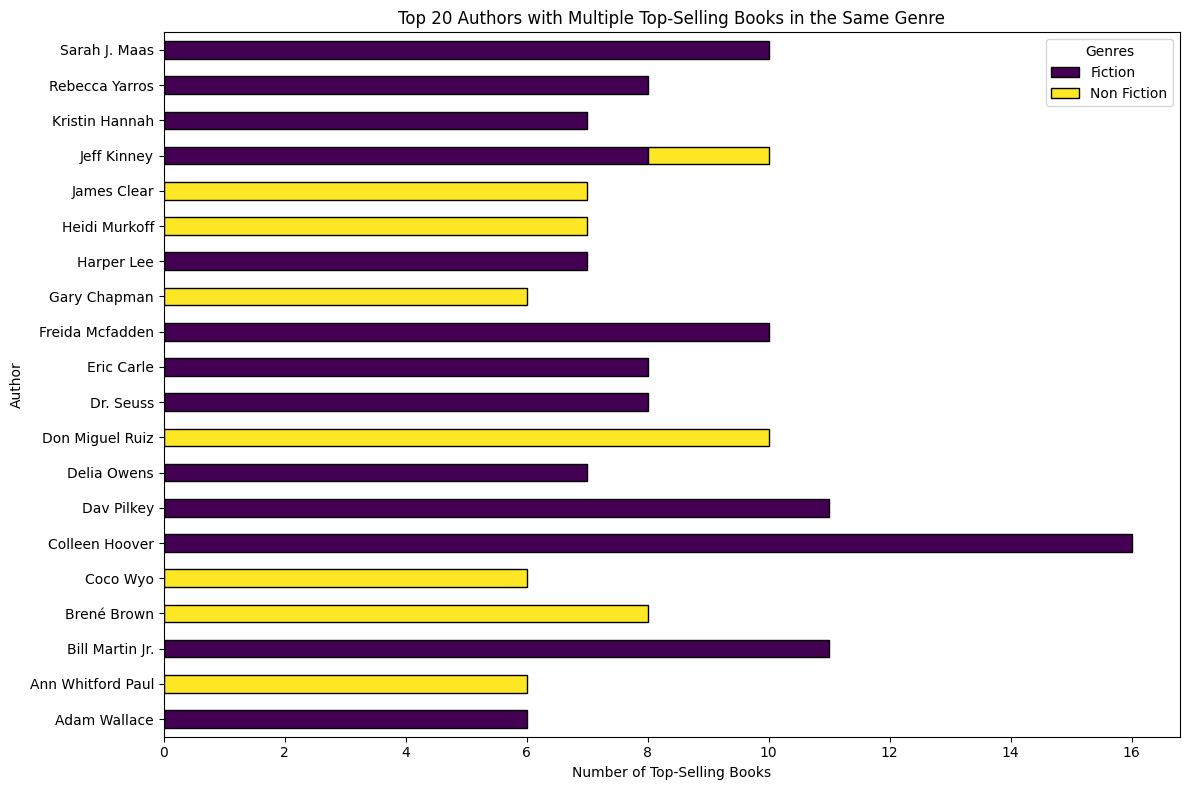

In [149]:
author_genre_counts = df.groupby(['Author', 'Genres']).size().reset_index(name='book_count')
# Filter out authors with only 1 book per genre
authors_with_multiple_books = author_genre_counts[author_genre_counts['book_count'] > 1]
top_20_authors = authors_with_multiple_books.groupby('Author')['book_count'].sum().nlargest(20).index

# Filter the original dataframe to include only the top 10 authors
top_20_data = authors_with_multiple_books[authors_with_multiple_books['Author'].isin(top_20_authors)]

# Pivot the data to create a matrix of authors vs genres
pivot_data = top_20_data.pivot_table(index='Author', columns='Genres', values='book_count', aggfunc='sum', fill_value=0)

# Create a stacked bar plot
pivot_data.plot(kind='barh', stacked=True, figsize=(12, 8), cmap='viridis', edgecolor='black')

# Add title and labels
plt.title('Top 20 Authors with Multiple Top-Selling Books in the Same Genre')
plt.xlabel('Number of Top-Selling Books')
plt.ylabel('Author')

# Display the plot
plt.tight_layout()
plt.show()

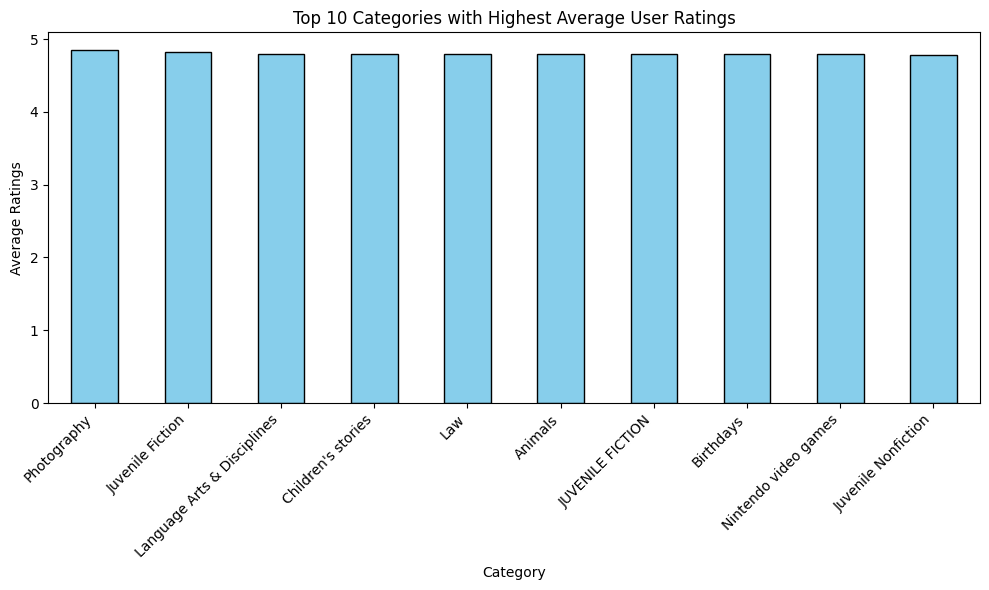

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df has 'Category' and 'Ratings' columns
category_ratings = df.groupby('Categories')['Rating'].mean().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 categories by average rating
plt.figure(figsize=(10, 6))
category_ratings.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Top 10 Categories with Highest Average User Ratings')
plt.xlabel('Category')
plt.ylabel('Average Ratings')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

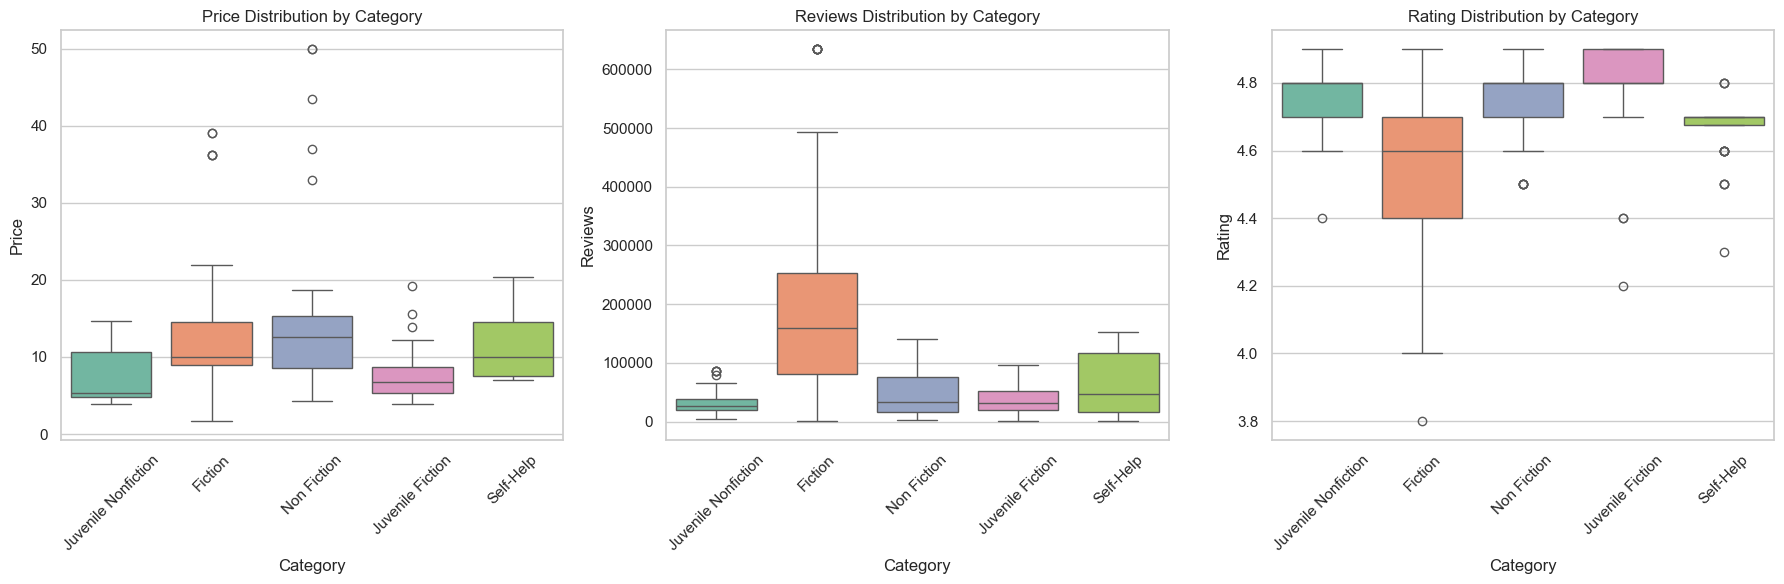

In [153]:
top_5_categories = df['Categories'].value_counts().nlargest(5).index
df_top5 = df[df['Categories'].isin(top_5_categories)]

# Set the style
sns.set(style="whitegrid")

# Variables and titles
variables = ['Price', 'Reviews', 'Rating']
titles = ['Price Distribution by Category', 'Reviews Distribution by Category', 'Rating Distribution by Category']

# Subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, var in enumerate(variables):
    sns.boxplot(data=df_top5, x='Categories', y=var, hue='Categories', ax=axes[i],
                palette='Set2', legend=False)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel(var)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show();

/var/folders/1h/kvjqjlx908g4mdp8fc29vsb40000gr/T/ipykernel_21924/827795730.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_publishers, x='Publisher', y=var, ax=axes[i],
/var/folders/1h/kvjqjlx908g4mdp8fc29vsb40000gr/T/ipykernel_21924/827795730.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_publishers, x='Publisher', y=var, ax=axes[i],
/var/folders/1h/kvjqjlx908g4mdp8fc29vsb40000gr/T/ipykernel_21924/827795730.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_publishers, x='Publisher', y=var, a

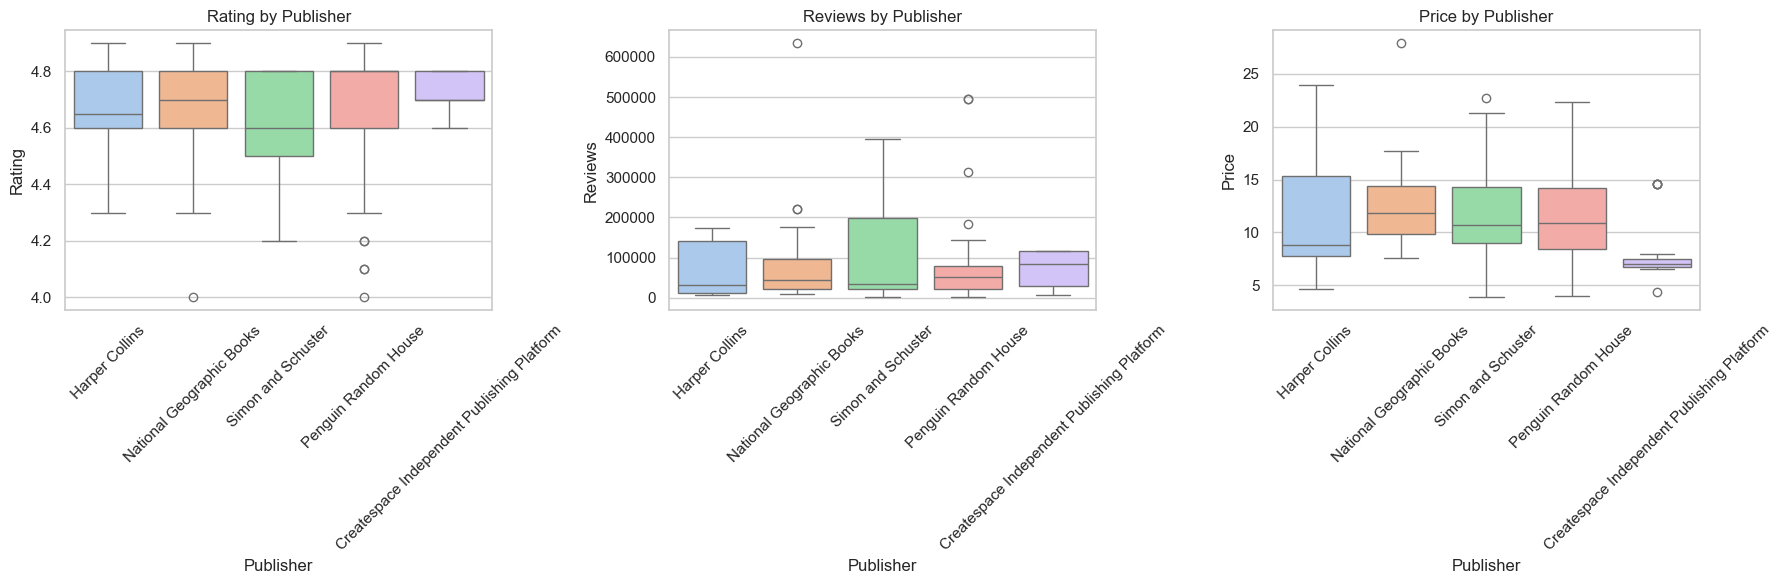

In [154]:

# Top 5 or 10 publishers (adjust as needed)
top_publishers = df['Publisher'].value_counts().nlargest(5).index
df_top_publishers = df[df['Publisher'].isin(top_publishers)]

# Variables and titles
variables = ['Rating', 'Reviews', 'Price']
titles = ['Rating by Publisher', 'Reviews by Publisher', 'Price by Publisher']

# Set plot style
sns.set(style="whitegrid")

# Subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, var in enumerate(variables):
    sns.boxplot(data=df_top_publishers, x='Publisher', y=var, ax=axes[i],
                palette='pastel')
    axes[i].set_title(titles[i])
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('Publisher')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

In [192]:
# Identify top 10 authors by frequency
top_authors = df['Author'].value_counts().nlargest(10).index
df_top_authors = df[df['Author'].isin(top_authors)]

# Group and calculate mean of metrics
author_stats = df_top_authors.groupby('Author')[['Rating', 'Price', 'Reviews']].mean().reset_index()

# Set up the plots for each metric (Rating, Price, Reviews)
metrics = ['Rating', 'Price', 'Reviews']
colors = ['blue', 'mediumseagreen', 'tomato']


/var/folders/1h/kvjqjlx908g4mdp8fc29vsb40000gr/T/ipykernel_21924/483927822.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=author_stats, x='Author', y='Rating', palette="Set1")


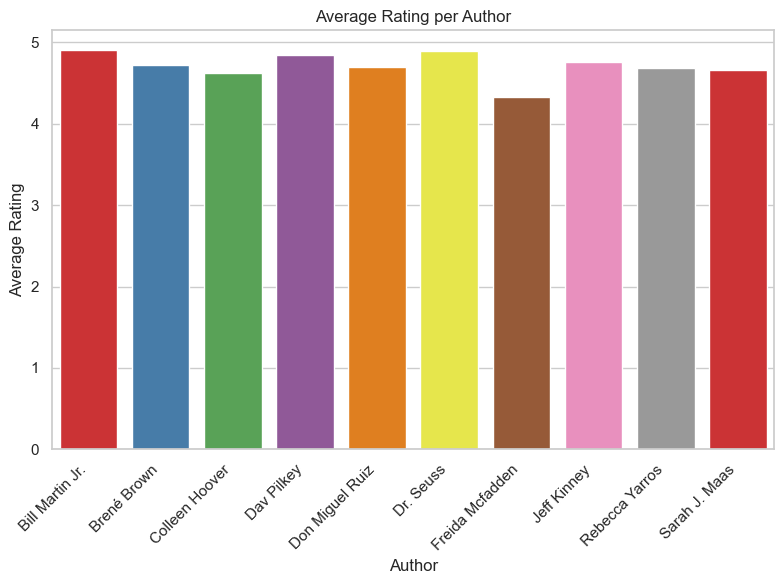

In [196]:
#Rating
plt.figure(figsize=(8, 6))
sns.barplot(data=author_stats, x='Author', y='Rating', palette="Set1")
plt.title('Average Rating per Author')
plt.xlabel('Author')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha= "right")
plt.tight_layout()
plt.show()

/var/folders/1h/kvjqjlx908g4mdp8fc29vsb40000gr/T/ipykernel_21924/372581363.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=author_stats, x='Author', y='Price', palette="Set1")


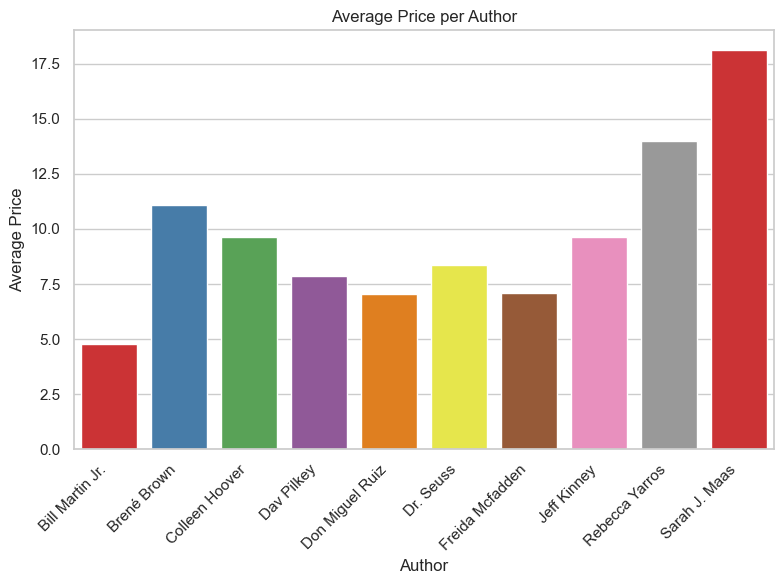

In [195]:
# Plot for Price
plt.figure(figsize=(8, 6))
sns.barplot(data=author_stats, x='Author', y='Price', palette="Set1")
plt.title('Average Price per Author')
plt.xlabel('Author')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha= "right")
plt.tight_layout()
plt.show()

/var/folders/1h/kvjqjlx908g4mdp8fc29vsb40000gr/T/ipykernel_21924/3548526875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=author_stats, x='Author', y='Reviews', palette="Set1")


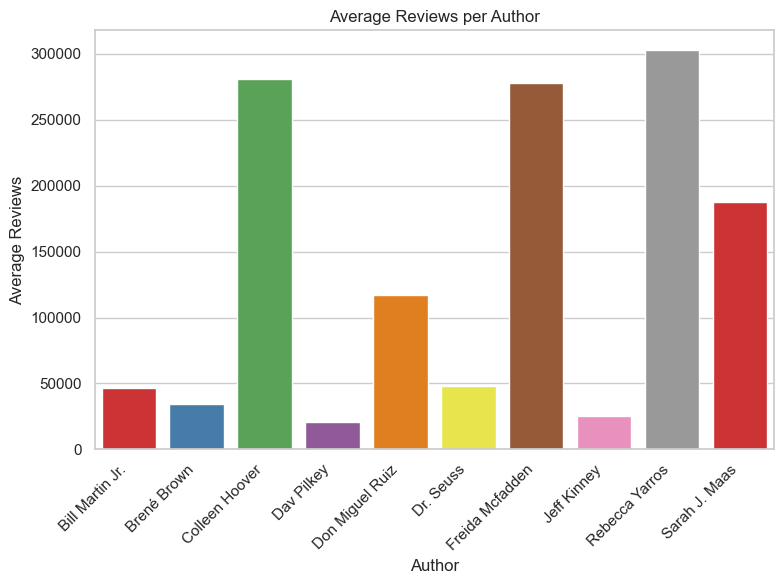

In [198]:
# Plot for Reviews
plt.figure(figsize=(8, 6))
sns.barplot(data=author_stats, x='Author', y='Reviews', palette="Set1")
plt.title('Average Reviews per Author')
plt.xlabel('Author')
plt.ylabel('Average Reviews')
plt.xticks(rotation=45, ha = "right")
plt.tight_layout()
plt.show()

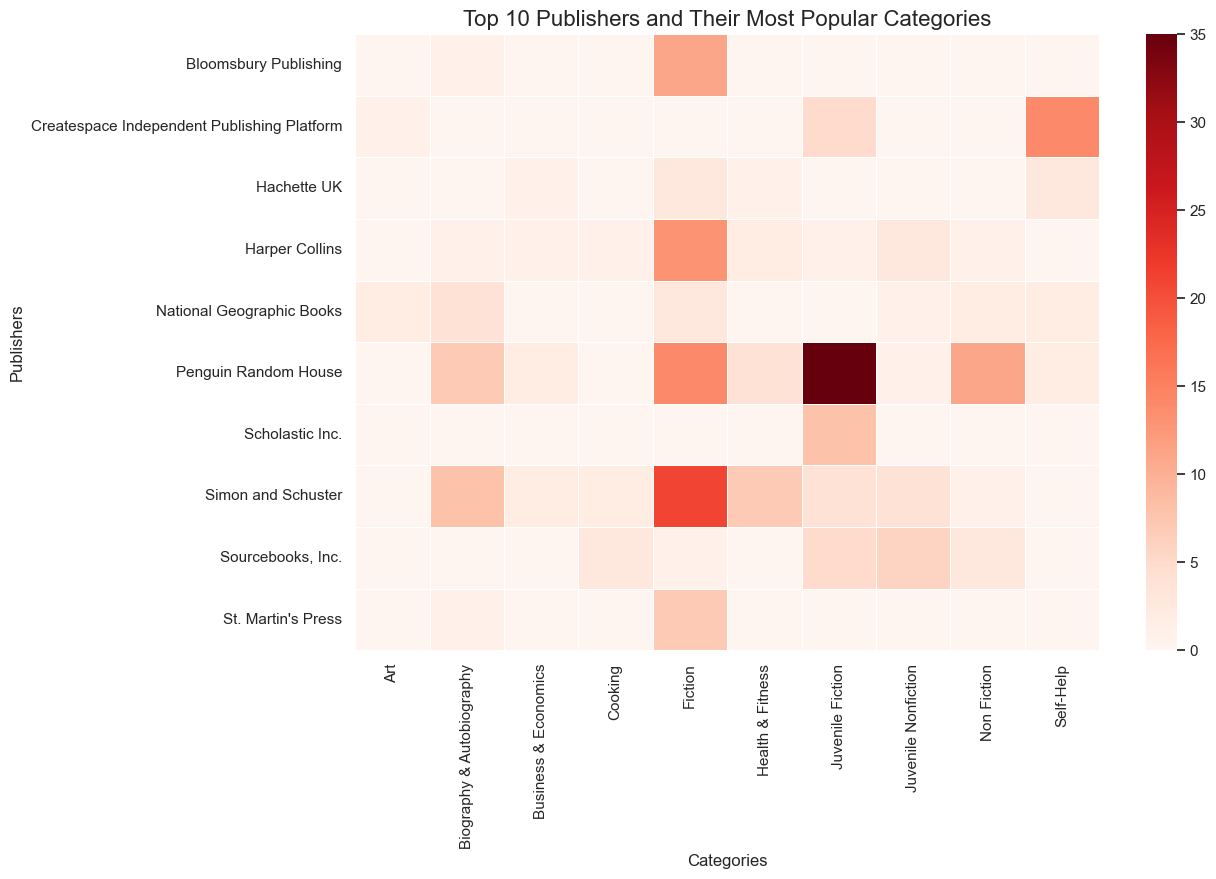

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: Filter the top 10 publishers and top 10 categories
top_publishers = df['Publisher'].value_counts().head(10).index
top_categories = df['Categories'].value_counts().head(10).index

# Filter the DataFrame to include only top 10 publishers and top 10 categories
filtered_df = df[df['Publisher'].isin(top_publishers) & df['Categories'].isin(top_categories)]

# Step 2: Group by 'Publisher' and 'Categories', and count the occurrences
publisher_category_counts = filtered_df.groupby(['Publisher', 'Categories']).size().unstack(fill_value=0)

# Step 3: Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(publisher_category_counts, annot=False, cmap='Reds', fmt='d', linewidths=0.5)

# Step 4: Title and labels
plt.title('Top 10 Publishers and Their Most Popular Categories', fontsize=16)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Publishers', fontsize=12)

# Show the plot
plt.show()
